## Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

#### Objective of Data Analysis:

Objective of Data Analysis is to identify the most promising leads (most likely to convert into paying customers) through building a model wherein a lead score to each of the leads are assigned such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

### Approach for Data Analysis & Model Building:
    * Reading & Understanding Data
    * Data Cleaning & EDA
    * Data Preparation
    * Model Building
    * Model Evaluation

## Importing Python Libraries

In [1]:
# Importing required python libraries 
import numpy as np
import pandas as pd

# for data visualizaiton:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [2]:
# Read the csv file into python
# Change the 'Leads.csv' file path below here

Leads_df=pd.read_csv(r'C:\Users\Negi\Desktop\MSN study\ML1\Module 7 Lead Scoring Case study\Working files\Data files\Leads.csv')

In [3]:
# Examine the dataframe
Leads_df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Examine the dataframe
Leads_df.shape

(9240, 37)

In [5]:
# Checking the dataframe column names
Leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Definition of Data Columns:
* Prospect ID -  A unique ID with which the customer is identified.
* Lead Number -  A lead number assigned to each lead procured.
* Lead Origin -  The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
* Lead Source -  The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
* Do Not Email- An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
* Do Not Call -	An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
* Converted   -  The target variable. Indicates whether a lead has been successfully converted or not.
* TotalVisits -	The total number of visits made by the customer on the website.
* Total Time Spent on Website -	The total time spent by the customer on the website.
* Page Views Per Visit -	Average number of pages on the website viewed during the visits.
* Last Activity - Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
* Country -	The country of the customer.
* Specialization -	The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
* How did you hear about X Education -	The source from which the customer heard about X Education.
* What is your current occupation -	Indicates whether the customer is a student, umemployed or employed.
* What matters most to you in choosing this course - An option selected by the customer indicating what is their main motto behind doing this course.
* Search -	Indicating whether the customer had seen the ad in Search.
* Magazine - Indicating whether the customer had seen the ad in	Magazine
* Newspaper Article	- Indicating whether the customer had seen the ad in Newspaper Article
* X Education Forums - Indicating whether the customer had seen the ad in X Education Forums
* Newspaper - Indicating whether the customer had seen the ad in Newspaper
* Digital Advertisement - Indicating whether the customer had seen the ad in Digital Advertisement
* Through Recommendations -	Indicates whether the customer came in through recommendations.
* Receive More Updates About Our Courses -	Indicates whether the customer chose to receive more updates about the courses.
* Tags -	Tags assigned to customers indicating the current status of the lead.
* Lead Quality - Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
* Update me on Supply Chain Content -	Indicates whether the customer wants updates on the Supply Chain Content.
* Get updates on DM Content -	Indicates whether the customer wants updates on the DM Content.
* Lead Profile -	A lead level assigned to each customer based on their profile.
* City - The city of the customer.
* Asymmetrique Activity Index -	An index assigned to each customer based on their activity
* Asymmetrique Profile Index -	An index assigned to each customer based on their profile
* Asymmetrique Activity Score -	A score assigned to each customer based on their activity
* Asymmetrique Profile Score -	A score assigned to each customer based on their profile
* I agree to pay the amount through cheque - Indicates whether the customer has agreed to pay the amount through cheque or not.
* a free copy of Mastering The Interview - Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
* Last Notable Activity -	The last notable acitivity performed by the student.

In [6]:
# Examine the summary of dataframe
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## Data Cleaning & EDA

Looking at the datas we can see that there are some 'select' values in mentioned in few datapoints. 'Select' is a default value when a customer doesn't fill the information. Therefore, all 'Select' values can be considered as null values.


In [7]:
# Replacing all Select values with null values
Leads_df=Leads_df.replace(to_replace ='Select', value =np.NaN)

In [8]:
# Checking the updated dataframe
Leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#checking the columns having missing values
miscount=round(100*(Leads_df.isnull().sum(axis=0)/len(Leads_df.index)),2)
miscount=miscount[miscount>0]
miscount.sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Activity Score                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

* Above columns have missing values in the dataset.

And out of above columns, following columns can be dropped as the missing values are high and also looking at definition given in the data dictionary, these columns seems not much significant for data analysis.
* How did you hear about X Education
* Lead Profile
* Lead Quality
* Asymmetrique Profile Score
* Asymmetrique Profile Index
* Asymmetrique Activity Index
* Asymmetrique Activity Score
* City
* Tags
* What matters most to you in choosing a course

So it better to drop these above columns for Analysis.

'Prospect ID', 'Lead Number' are just identification nos. These shall also so be dropped for analysis

In [10]:
# Dropping the above mentioned columns
Leads_df=Leads_df.drop(['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Score',
                          'Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score',
                         'City','Tags','What matters most to you in choosing a course','Prospect ID','Lead Number'],axis=1)

In [11]:
Leads_df.shape

(9240, 25)

There are 25 no. of variable remaining now.

Following data columns has very few missing values. These can be imputed with 'Mode' of the respective columns. However,we will drop the rows where these values are not available as the data loss is very less.

Missing % of below columns:
* Page Views Per Visit                              1.48%
* TotalVisits                                       1.48%
* Last Activity                                     1.11%
* Lead Source                                       0.39%

In [12]:
# Removing rows which has null values in columns 'Page Views Per Visit','TotalVisits', 'Last Activity', 'Lead Source':

Leads_df=Leads_df.dropna(subset=['Page Views Per Visit', 'TotalVisits', 'Last Activity', 'Lead Source'])

In [13]:
Leads_df.shape

(9074, 25)

It means that (9240-9074)/9240 = 0.017965 i.e 1.7% data is lost here when we dropped rows having null values in columns 'Page Views Per Visit','TotalVisits', 'Last Activity', 'Lead Source'

Following columns are having null values. However, Looking at the data dictionary we can say these columns could be useful for analysis. We will impute the null values here. The null values will be imputed with random values such that values distribution will remain same.
* Specialization
* What is your current occupation
* Country

In [14]:
# Checking values distribution before imputing the null values in the 'Specialization' column
(Leads_df['Specialization'].value_counts()/(Leads_df['Specialization'].value_counts().sum())*100).round(2)

Finance Management                   16.56
Human Resource Management            14.45
Marketing Management                 14.21
Operations Management                 8.62
Business Administration               6.89
IT Projects Management                6.32
Supply Chain Management               5.97
Banking, Investment And Insurance     5.78
Travel and Tourism                    3.49
Media and Advertising                 3.49
International Business                3.04
Healthcare Management                 2.69
E-COMMERCE                            1.92
Hospitality Management                1.92
Retail Management                     1.73
Rural and Agribusiness                1.26
E-Business                            0.98
Services Excellence                   0.69
Name: Specialization, dtype: float64

In [15]:
# Checking values distribution before imputing the null values in the 'What is your current occupation' column
(Leads_df['What is your current occupation'].value_counts()/(Leads_df['What is your current occupation'].value_counts().sum())*100).round(2)

Unemployed              85.68
Working Professional    10.59
Student                  3.22
Other                    0.23
Housewife                0.14
Businessman              0.13
Name: What is your current occupation, dtype: float64

In [16]:
# Checking values distribution before imputing the null values in the 'Country' column
(Leads_df['Country'].value_counts()/(Leads_df['Country'].value_counts().sum())*100).round(2)

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Bahrain                  0.10
Hong Kong                0.10
France                   0.09
Oman                     0.09
unknown                  0.07
Germany                  0.06
Canada                   0.06
Kuwait                   0.06
Nigeria                  0.06
South Africa             0.06
Sweden                   0.04
Italy                    0.03
Bangladesh               0.03
Philippines              0.03
Uganda                   0.03
Netherlands              0.03
China                    0.03
Ghana                    0.03
Belgium                  0.03
Asia/Pacific Region      0.03
Denmark                  0.01
Vietnam                  0.01
Indonesia                0.01
Tanzania                 0.01
Malaysia                 0.01
Russia    

In [17]:
# We will impute the null values now.

# Providing seed for random function
np.random.seed(0)

# replacing null values with random values for 'specialization' column
s = Leads_df['Specialization'].value_counts(normalize=True)
missing = Leads_df['Specialization'].isnull()
Leads_df.loc[missing,'Specialization'] = np.random.choice(s.index, size=len(Leads_df[missing]),p=s.values)

# replacing null values with random values for 'What is your current occupation' column
s= Leads_df['What is your current occupation'].value_counts(normalize=True)
missing= Leads_df['What is your current occupation'].isnull()
Leads_df.loc[missing,'What is your current occupation'] = np.random.choice(s.index, size=len(Leads_df[missing]),p=s.values)

# replacing null values with random values for 'Country' column
s = Leads_df['Country'].value_counts(normalize=True)
missing = Leads_df['Country'].isnull()
Leads_df.loc[missing,'Country'] = np.random.choice(s.index, size=len(Leads_df[missing]),p=s.values)

In [18]:
# Checking values distribution after imputing the null values in the 'Specialization' column
(Leads_df['Specialization'].value_counts()/(Leads_df['Specialization'].value_counts().sum())*100).round(2)

Finance Management                   16.65
Human Resource Management            14.34
Marketing Management                 14.26
Operations Management                 8.53
Business Administration               6.81
IT Projects Management                6.11
Supply Chain Management               6.02
Banking, Investment And Insurance     5.66
Travel and Tourism                    3.63
Media and Advertising                 3.30
International Business                3.13
Healthcare Management                 2.60
Retail Management                     2.12
Hospitality Management                1.99
E-COMMERCE                            1.90
Rural and Agribusiness                1.33
E-Business                            0.96
Services Excellence                   0.67
Name: Specialization, dtype: float64

In [19]:
# Checking values distribution after imputing the null values in the 'What is your current occupation' column
(Leads_df['What is your current occupation'].value_counts()/(Leads_df['What is your current occupation'].value_counts().sum())*100).round(2)

Unemployed              86.09
Working Professional    10.46
Student                  2.99
Other                    0.23
Housewife                0.12
Businessman              0.11
Name: What is your current occupation, dtype: float64

In [20]:
# Checking values distribution after imputing the null values in the 'Country' column
(Leads_df['Country'].value_counts()/(Leads_df['Country'].value_counts().sum())*100).round(2)

India                   95.82
United States            0.96
United Arab Emirates     0.76
Singapore                0.33
Saudi Arabia             0.32
United Kingdom           0.24
Australia                0.19
Qatar                    0.15
Oman                     0.12
Hong Kong                0.09
South Africa             0.08
Bahrain                  0.08
France                   0.08
unknown                  0.07
Germany                  0.07
Philippines              0.06
Nigeria                  0.06
Kuwait                   0.06
Canada                   0.06
Sweden                   0.04
Netherlands              0.04
Ghana                    0.04
Belgium                  0.03
Asia/Pacific Region      0.02
Liberia                  0.02
Bangladesh               0.02
Italy                    0.02
Tanzania                 0.02
Uganda                   0.02
Kenya                    0.02
China                    0.02
Switzerland              0.02
Indonesia                0.01
Malaysia  

We can see above that Data distribution even after imputing null values is almost same for the columns 'Specialization', 'What is your current occupation', 'Country'

In [21]:
#checking the columns having missing values
Leads_df.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

There are no null values now in the dataframe.

In [22]:
# We will check value counts for all the Categorical variables.
cat_var=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity', 'Country', 'Specialization',
         'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
         'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
         'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
         'A free copy of Mastering The Interview', 'Last Notable Activity']

for i in cat_var:
    print(Leads_df[[i]].apply(pd.Series.value_counts))

                         Lead Origin
Landing Page Submission         4885
API                             3578
Lead Add Form                    581
Lead Import                       30
                   Lead Source
Google                    2868
Direct Traffic            2543
Olark Chat                1753
Organic Search            1154
Reference                  443
Welingak Website           129
Referral Sites             125
Facebook                    31
bing                         6
google                       5
Click2call                   4
Social Media                 2
Live Chat                    2
Press_Release                2
WeLearn                      1
blog                         1
testone                      1
youtubechannel               1
Pay per Click Ads            1
NC_EDM                       1
welearnblog_Home             1
     Do Not Email
No           8358
Yes           716
     Do Not Call
No          9072
Yes            2
   Converted
0       5639
1 

Looking at the value counts, we see that, In following columns almost all the values are single value 'No'. Therefore, these columns will not add any value for modeling. We will drop these columns

* Do Not Call
* Search
* Magazine
* Newspaper Article
* X Education Forums
* Newspaper
* Digital Advertisement
* Through Recommendations
* Receive More Updates About Our Courses
* Update me on Supply Chain Content
* Get updates on DM Content
* I agree to pay the amount through cheque

Similarly 'Country' column is also mostly India. So we will drop the column as it won't add value for modeling.

So we will drop these columns as well from the dataset.

In [23]:
# Dropping the above mentioned columns from the Dataframe
Leads_main=Leads_df.drop(['Do Not Call', 'Country','Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
                          'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                         'Update me on Supply Chain Content', 'Get updates on DM Content', 
                          'I agree to pay the amount through cheque' ],axis=1)

In [24]:
Leads_main.shape

(9074, 12)

Therefore, Selected columns variable types are as below:

#### Categorical Variables
'Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity' 

#### Numeric Variables:
'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'


#### Visualising Categorical Variables

(array([0, 1]), <a list of 2 Text xticklabel objects>)

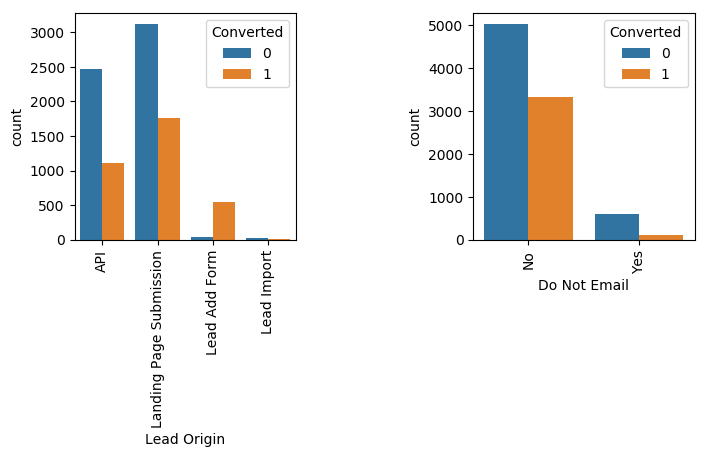

In [25]:
# Checking distribution of Categorical variables with respect to Target variable 'Converted'

plt.figure(figsize=(8,3),dpi=100)
plt.subplots_adjust(wspace = 0.8)

plt.subplot(1,2,1)
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = Leads_main)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = Leads_main)
plt.xticks(rotation = 90)

* For the customer whose Lead Origin identifier is 'Lead Add Form', has very high probablity of conversion
* Customer who has selected that they don't want to be emailed about the course, has very less chance of conversion

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

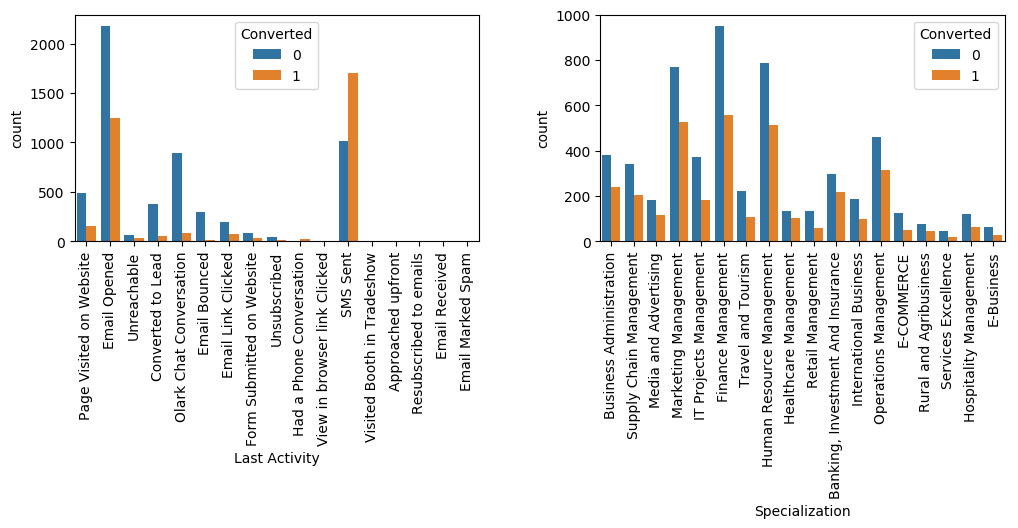

In [26]:
# Checking distribution of Categorical variables with respect to Target variable 'Converted'

plt.figure(figsize=(12,3),dpi=100)
plt.subplots_adjust(wspace = 0.3)

plt.subplot(1,2,1)
sns.countplot(x = 'Last Activity', hue = 'Converted', data = Leads_main)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = 'Specialization', hue = 'Converted', data = Leads_main)
plt.xticks(rotation = 90)

* Customer whose last activity was 'SMS sent', has better chance of conversion compare to customer who has performed other last activities
* Customer whose last activity were 'Olark Chat Conversation', 'Email Bounced', 'Converted to Lead', have less chance of conversion.
* Customer who have specialization in 'Marketing management', 'Finance management', 'Human Resource management', are higher in numbers who were looking for such online course. However, Conversion chance are similar for all the customer across the 'Specilization' segment.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

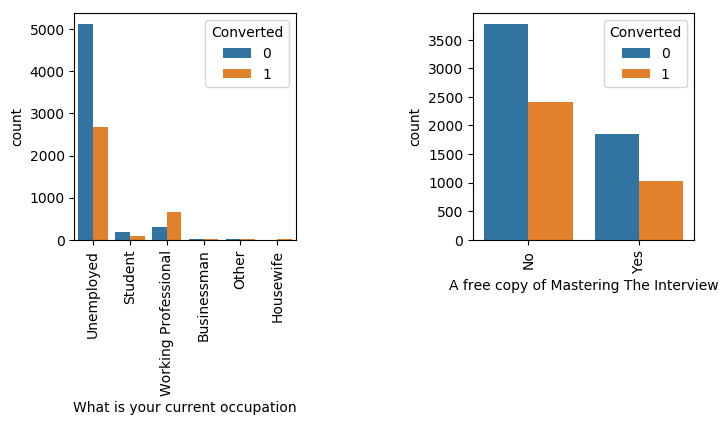

In [27]:
# Checking distribution of Categorical variables with respect to Target variable 'Converted'

plt.figure(figsize=(8,3),dpi=100)
plt.subplots_adjust(wspace = 0.8)

plt.subplot(1,2,1)
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = Leads_main)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = Leads_main)
plt.xticks(rotation = 90)

* For the customer who are working professionals, have high probablity of conversion

* There is no significance impact on Conversion of whether Customer has selected yes or no for free copy of mastering the interview

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

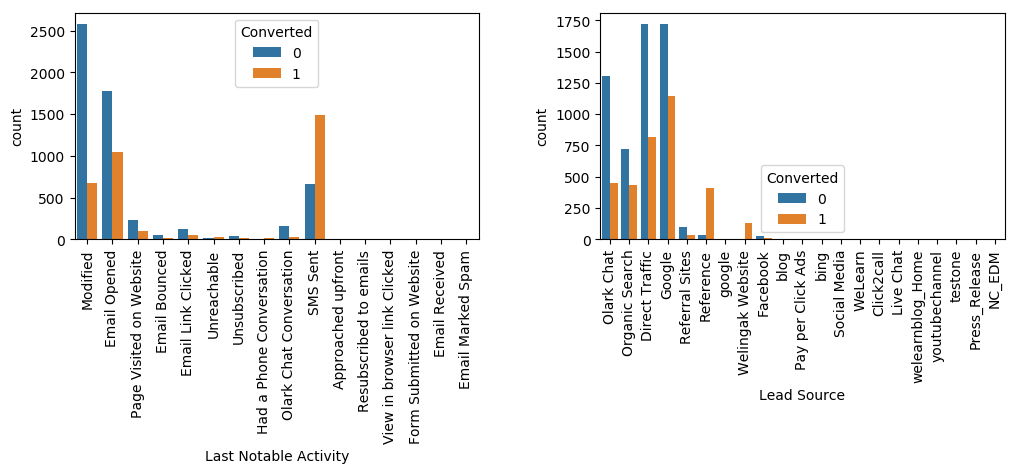

In [28]:
# Checking distribution of Categorical variables with respect to Target variable 'Converted'

plt.figure(figsize=(12,3),dpi=100)
plt.subplots_adjust(wspace = 0.3)

plt.subplot(1,2,1)
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = Leads_main)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = 'Lead Source', hue = 'Converted', data = Leads_main)
plt.xticks(rotation = 90)

* Customer whose last notable activity was 'SMS sent', has better chance of conversion compare to customer who has performed other last activities
* Customer whose last notable activity was 'Modified', have less chance of conversion.
* Customer whose lead Source was from 'Reference' and Welingak Website  have better chance of conversion.

In [29]:
# View the statistical details for the numeric columns of the dataframe.
Leads_main.describe().round(2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.00,9074.00,9074.00,9074.00
mean,0.38,3.46,482.89,2.37
std,0.49,4.86,545.26,2.16
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,11.00,1.00
50%,0.00,3.00,246.00,2.00
75%,1.00,5.00,922.75,3.20
max,1.00,251.00,2272.00,55.00


We can see here, There are outliers in the numeric variables

#### Visualising Numeric Variables

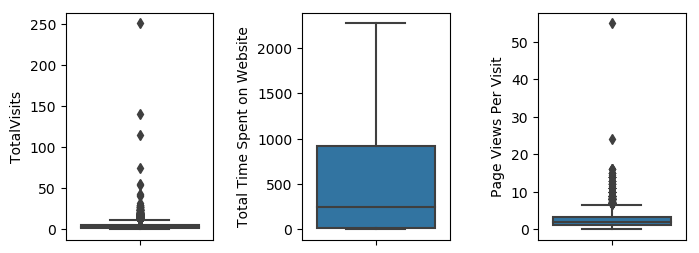

In [30]:
# Outliers are checked for numeric columns through Boxplots
plt.figure(figsize=(8,3),dpi=100)
plt.subplots_adjust(wspace = 0.6,hspace = 0.3)

plt.subplot(1,3,1)
sns.boxplot(y=Leads_main['TotalVisits'])
plt.subplot(1,3,2)
sns.boxplot(y=Leads_main['Total Time Spent on Website'])
plt.subplot(1,3,3)
sns.boxplot(y=Leads_main['Page Views Per Visit'])

In [31]:
# Checking for outliers in the continuous variables
num_Leads = Leads_main[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [32]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_Leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


There are outliers in 'Total visits' and 'Pag Views Per Visit'

In [33]:
Leads_main.shape

(9074, 12)

In [34]:
# Outlier treatment

# Creating function for outlier removal.
def remove_outlier(df_in, col_name): 
    Q1 = df_in[col_name].quantile(0.05) 
    Q3 = df_in[col_name].quantile(0.95) 
    IQR=Q3-Q1               # Interquantile range
    df_out = df_in.loc[(df_in[col_name] >= Q1) & (df_in[col_name] <= Q3)]
    return(df_out)

Leads_main = remove_outlier(Leads_main,'TotalVisits') # For outlier treatment of 'TotalVisits' column
Leads_main = remove_outlier(Leads_main,'Total Time Spent on Website') # For outlier treatment of 'Total Time Spent on Website' column
Leads_main = remove_outlier(Leads_main,'Page Views Per Visit') # For outlier treatment of 'Page Views Per Visit' column

In [35]:
Leads_main.shape

(8027, 12)

It means that (9074-8027)/9074 = 0.11538 i.e 11.5% data is lost here during outlier treatment

## Data Preparation

#### Converting Categorical variables to numeric for model building

In [36]:
# We will check value counts for all the Categorical variables.
cat_var=['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'Last Activity', 'Specialization', 
         'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']

for i in cat_var:
    print(Leads_main[[i]].apply(pd.Series.value_counts))

                         Lead Origin
Landing Page Submission         4111
API                             3319
Lead Add Form                    568
Lead Import                       29
                   Lead Source
Google                    2521
Direct Traffic            2192
Olark Chat                1732
Organic Search             869
Reference                  433
Welingak Website           128
Referral Sites              96
Facebook                    30
bing                         6
google                       5
Click2call                   3
Social Media                 2
Live Chat                    2
WeLearn                      1
blog                         1
testone                      1
youtubechannel               1
Pay per Click Ads            1
NC_EDM                       1
welearnblog_Home             1
Press_Release                1
     Do Not Email
No           7401
Yes           626
   Converted
0       5144
1       2883
                              Last Activ

Following Categorical variables has only two values each (Yes or No):

* Do Not Email
* A free copy of Mastering The Interview

Therefore, we will convert them to numeric values as '1' and '0' for model preparation

In [37]:
# Converting above variables to numeric values as '1' and '0' for model preparation

Leads_main['Do Not Email']=Leads_main['Do Not Email'].map({'Yes':1,'No':0})
Leads_main['A free copy of Mastering The Interview']=Leads_main['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

Following Categorical variables has more than two values. Therefore, we will create dummy variables for these.

* Lead Origin
* Lead Source
* Last Activity
* Specialization
* What is your current occupation
* Last Notable Activity

In [38]:
# Creating dummy variables for above mentioned Categorical variables

var=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Last Notable Activity']
for i in var:
    dum=pd.get_dummies(Leads_main[i],drop_first=True).rename(columns=lambda x: i + '_'+ str(x)) # Creating dummy variable dataframe
    Leads_main = pd.concat([Leads_main, dum], axis = 1)    # Concatinating the dummy variable dataframe with Leads_main dataframe
    Leads_main=Leads_main.drop([i], axis=1)  # droping orignial column of categorical variable from Leads_main dataframe

In [39]:
Leads_main.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Model Building

### Test-Train Split

We will split the data into train data and test data

In [40]:
# Importing required python library for train test split

from sklearn.model_selection import train_test_split

In [41]:
# Putting feature variables to X
X = Leads_main.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
# Putting target variable to y
y = Leads_main['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [43]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [44]:
# Checking shape of train data
X_train.shape

(5618, 81)

In [45]:
# Checking shape of test data
X_test.shape

(2409, 81)

### Feature Scaling of Numeric Variables

In [46]:
# Importing required python library for Standard Scaling

from sklearn.preprocessing import StandardScaler

In [47]:
# instantiating an Standard Scaler object
scaler = StandardScaler()

# Scaling the numeric variables data
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2626,0,-1.158807,-0.860855,-1.229836,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2973,0,0.563804,0.097800,1.185400,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5392,1,-0.728154,-0.109591,-0.626027,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8344,0,-1.158807,-0.860855,-1.229836,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1763,0,0.133151,-0.287355,0.581591,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
# Checking the data imbalance for 'Converted' column
Converted = (sum(Leads_main['Converted'])/len(Leads_main['Converted'].index))*100
Converted

35.91628254640588

We have almost 36% converted values in the given dataset.

#### Running First Training Model with All variables

In [49]:
# importing required python library for modeling
import statsmodels.api as sm

In [50]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5544
Model Family:                Binomial   Df Model:                           73
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 06 Jan 2020   Deviance:                          nan
Time:                        22:38:13   Pearson chi2:                 6.50e+18
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -7.441e+14   8.57e+07  -8.68e+06      0.000   -7.44e+14   -7.44e+14
Do Not Email                                         -5.754e+13   4.83e+06  -1.19e+07      0.000   -5.75e+13   -5.75e+13
TotalVisits                                             1.8e+14   1.56e+06   1.15e+08      0.000     1.8e+14     1.8e+14
Total Time Spent on Website                           7.825e+14   1.06e+06    7.4e+08      0.000    7.82e+14    7.82e+14
Page Views Per Visit                                 -9.261e+13   1.72e+06   -5.4e+07      0.000   -9.26e+13   -9.26e+13
A free copy of Mastering The Interview               -3.736e+13   2.89e+06  -1.29e+07      0.000   -3.74e+13   -3.74e+13
Lead Origin_Landing Page Submission                   3.561e+13   2.99e+06   1.19e+07      0.000    3.56e+13    3.56e+13
Lead Origin_Lead Add Form                             5.332e+15   6.73e+07   7.92e+07      0.000    5.33e+15    5.33e+15
Lead Origin_Lead Import                                2.73e+15   6.95e+07   3.93e+07      0.000    2.73e+15    2.73e+15
Lead Source_Direct Traffic                            5.117e+15   7.77e+07   6.58e+07      0.000    5.12e+15    5.12e+15
Lead Source_Facebook                                  7.505e+14   1.03e+08    7.3e+06      0.000    7.51e+14    7.51e+14
Lead Source_Google                                    5.342e+15   7.76e+07   6.88e+07      0.000    5.34e+15    5.34e+15
Lead Source_Live Chat                                 6.353e+15   6.14e+07   1.04e+08      0.000    6.35e+15    6.35e+15
Lead Source_NC_EDM                                     -32.7815   1.04e-06  -3.15e+07      0.000     -32.782     -32.782
Lead Source_Olark Chat                                5.047e+15   7.78e+07   6.49e+07      0.000    5.05e+15    5.05e+15
Lead Source_Organic Search                            5.171e+15   7.77e+07   6.65e+07      0.000    5.17e+15    5.17e+15
Lead Source_Pay per Click Ads                         1.029e+15   1.03e+08      1e+07      0.000    1.03e+15    1.03e+15
Lead Source_Press_Release                             1.019e+15   1.03e+08   9.89e+06      0.000    1.02e+15    1.02e+15
Lead Source_Reference                                   2.1e+15    3.9e+07   5.38e+07      0.000     2.1e+15     2.1e+15
Lead Source_Referral Sites                            4.901e+15   7.81e+07   6.28e+07      0.000     4.9e+15     4.9e+15
Lead Source_Social Media                              5.302e+15   9.12e+07   5.81e+07      0.000     5.3e+15     5.3e+15
Lead Source_WeLearn                                   8.651e+15   1.03e+08   8.42e+07      0.000    8.65e+15    8.65e+15
Lead Source_Welingak Website                          2.027e+15   3.95e+07   5.13e+07      0.000    2.03e+15    2.03e+15
Lead Source_bing

### Building a logistic regression model

We will fit a logistic regression with training data using sklearn and RFE for feature selection.

#### Feature Selection Using RFE

In [51]:
# Importing required python library
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [52]:
# Importing required python library
from sklearn.feature_selection import RFE

# Running RFE with the output number of the variable equal to 12 for total 12 no. of most signification feature selection
rfe = RFE(logreg, 12)
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 38),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 40),
 ('A free copy of Mastering The Interview', False, 57),
 ('Lead Origin_Landing Page Submission', False, 44),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Facebook', False, 46),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_NC_EDM', False, 65),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 48),
 ('Lead Source_Press_Release', False, 63),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Social Media', False, 9),
 ('Lead Source_WeLearn', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 35),
 ('Lead Source_blog', False, 26),
 ('Lead Source_google', True, 1),
 (

In [54]:
# Top significant features selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [55]:
# Other features which was not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails

#### Assessing the model with StatsModels

In [56]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train[col])

# Running the logistic regression model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

# Summary of our model
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5605
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2358.8
Date:                Mon, 06 Jan 2020   Deviance:                       4717.7
Time:                        22:38:15   Pearson chi2:                 5.62e+03
No. Iterations:                    21   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# Calculate the VIFs for the new model

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,67.75
4,Lead Source_Reference,52.76
5,Lead Source_Welingak Website,16.00
3,Lead Source_Olark Chat,1.63
8,Last Activity_Olark Chat Conversation,1.38
1,Total Time Spent on Website,1.30
10,Last Notable Activity_SMS Sent,1.22
9,What is your current occupation_Working Profes...,1.15
0,Do Not Email,1.02
6,Lead Source_google,1.00


There few features which has high VIF. However, We will drop 'Lead Source_google' first as this feature has high p value which means this feature is not significant.

In [59]:
# Dropping 'Lead Source_google' column
col = col.drop('Lead Source_google', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [60]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5606
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2362.0
Date:                Mon, 06 Jan 2020   Deviance:                       4724.1
Time:                        22:38:16   Pearson chi2:                 5.62e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

In [61]:
# Calculate the VIFs for the new model

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,67.75
4,Lead Source_Reference,52.76
5,Lead Source_Welingak Website,16.00
3,Lead Source_Olark Chat,1.63
7,Last Activity_Olark Chat Conversation,1.38
1,Total Time Spent on Website,1.30
9,Last Notable Activity_SMS Sent,1.22
8,What is your current occupation_Working Profes...,1.15
0,Do Not Email,1.02
6,Last Activity_Had a Phone Conversation,1.00


There few features which has high VIF. However, We will drop 'Lead Source_Reference' first as this feature has high p value which means this feature is not significant.

In [62]:
# Dropping 'Lead Source_Reference' column
col = col.drop('Lead Source_Reference', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [63]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5607
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2362.2
Date:                Mon, 06 Jan 2020   Deviance:                       4724.5
Time:                        22:38:16   Pearson chi2:                 5.62e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

In [64]:
# Calculate the VIFs for the new model

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.63
2,Lead Origin_Lead Add Form,1.54
6,Last Activity_Olark Chat Conversation,1.38
4,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.30
8,Last Notable Activity_SMS Sent,1.22
7,What is your current occupation_Working Profes...,1.14
0,Do Not Email,1.02
5,Last Activity_Had a Phone Conversation,1.00
9,Last Notable Activity_Unreachable,1.00


* p-value for all the selected features are low and within an acceptable range (below 0.05)
* VIF values for the features are also low and within an acceptable range (below 5)

So we will go ahead and make our predictions using this model.

In [65]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2626    0.612646
2973    0.176747
5392    0.035841
8344    0.052991
1763    0.024545
9053    0.223307
5355    0.236802
109     0.220715
697     0.469900
645     0.236802
dtype: float64

In [66]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.61264586, 0.1767468 , 0.03584126, 0.05299125, 0.02454521,
       0.2233071 , 0.23680156, 0.22071533, 0.46990031, 0.23680156])

#### Creating a dataframe with the actual converted flag, the predicted probabilities and Lead score

In [67]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final['Lead_score'] = y_train_pred_final['Conversion_Prob']*100 # Lead Score is calculated from Conversion Probability in 1 to 100 scale
y_train_pred_final.head()

,Conversion_Prob,Converted,CustID,Lead_score
0,0.612646,1,2626,61.264586
1,0.176747,0,2973,17.674680
2,0.035841,0,5392,3.584126
3,0.052991,0,8344,5.299125
4,0.024545,0,1763,2.454521


##### Creating new column 'predicted' with 1 if Lead_score > 50 else 0

In [68]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_score.map(lambda x: 1 if x > 50 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion_Prob,Converted,CustID,Lead_score,predicted
0,0.612646,1,2626,61.264586,1
1,0.176747,0,2973,17.674680,0
2,0.035841,0,5392,3.584126,0
3,0.052991,0,8344,5.299125,0
4,0.024545,0,1763,2.454521,0


In [69]:
# Importing required Python library
from sklearn import metrics

In [70]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3186  403]
 [ 647 1382]]


In [71]:
# Predicted         not_converted    converted
# Actual
# not_converted        3186             403
# converted            647              1382  

## Model Evaluation

####  Checking Important metrics that are essential to evaluate the performance of a logistic regression model.
* Accuracy
* Sensitivity & Specificity
* Precision & Recall


In [72]:
# Checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8131007475970096


### Sensitivity & Specificity

In [73]:
# Defining True & False positive & negative from confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Calculating the sensitivity of logistic regression model
TP / float(TP+FN)

0.681123706259241

In [75]:
# Calculating specificity
TN / float(TN+FP)

0.887712454722764

#### Checking other Metrics

In [76]:
# Calculating false postive rate - predicting converted when customer have not been converted
print(FP/ float(TN+FP))

0.112287545277236


In [77]:
# Calculating positive predictive value
print (TP / float(TP+FP))

0.7742296918767507


In [78]:
# Calculating Negative predictive value
print (TN / float(TN+ FN))

0.8312027132794156


#### Plotting the ROC Curve

An ROC curve see the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity)

In [79]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [80]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

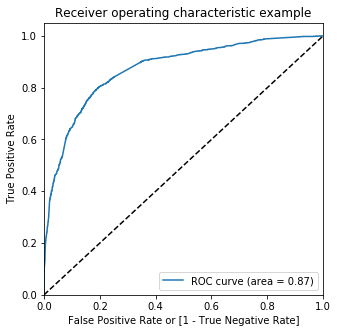

In [81]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Plotting sensitivity, specificity and accuracy together 

In [82]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conversion_Prob,Converted,CustID,Lead_score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.612646,1,2626,61.264586,1,1,1,1,1,1,1,1,0,0,0
1,0.176747,0,2973,17.674680,0,1,1,0,0,0,0,0,0,0,0
2,0.035841,0,5392,3.584126,0,1,0,0,0,0,0,0,0,0,0
3,0.052991,0,8344,5.299125,0,1,0,0,0,0,0,0,0,0,0
4,0.024545,0,1763,2.454521,0,1,0,0,0,0,0,0,0,0,0


In [83]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.361161  1.000000  0.000000
0.1   0.1  0.595230  0.950222  0.394539
0.2   0.2  0.734069  0.906851  0.636389
0.3   0.3  0.795123  0.814687  0.784062
0.4   0.4  0.811855  0.752587  0.845361
0.5   0.5  0.813101  0.681124  0.887712
0.6   0.6  0.807049  0.605224  0.921148
0.7   0.7  0.780527  0.461311  0.960992
0.8   0.8  0.763083  0.388369  0.974923
0.9   0.9  0.716447  0.229670  0.991641


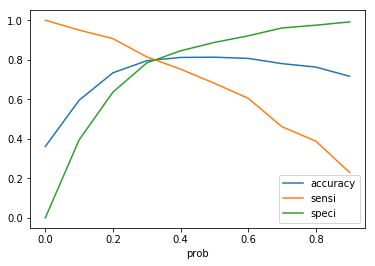

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### We can see from the curve above, sensitivity, specificity & accuracy has balanced value at around 0.35 conversion probability cutoff. However, We will check Precision & recall now first to decide the optimal cutoff

### Precision and Recall

In [85]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3186,  403],
       [ 647, 1382]], dtype=int64)

#### Precision
TP / TP + FP

In [86]:
# Calculating Precision

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7742296918767507

##### Recall
TP / TP + FN

In [87]:
# Calculating Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.681123706259241

### Precision and recall tradeoff

There is always a trade off between Precision & recall. We will see this trade off through precision recall curve

In [88]:
# Importing required python library

from sklearn.metrics import precision_recall_curve

In [89]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      0
 13      0
 14      1
 15      0
 16      0
 17      0
 18      0
 19      1
 20      0
 21      1
 22      0
 23      0
 24      0
 25      1
 26      1
 27      1
 28      0
 29      0
        ..
 5588    1
 5589    0
 5590    1
 5591    0
 5592    0
 5593    0
 5594    0
 5595    0
 5596    0
 5597    0
 5598    1
 5599    1
 5600    0
 5601    1
 5602    0
 5603    0
 5604    0
 5605    0
 5606    1
 5607    1
 5608    1
 5609    0
 5610    0
 5611    0
 5612    1
 5613    0
 5614    0
 5615    0
 5616    0
 5617    0
 Name: Converted, Length: 5618, dtype: int64, 0       1
 1       0
 2       0
 3       0
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      0
 13      0
 14      1
 15      0
 16      1
 17      0
 18      0
 19      1
 20      0
 21      0
 22      0
 23      0
 24      0
 25      

#### Plotting the precision recall curve

In [90]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Lead_score)

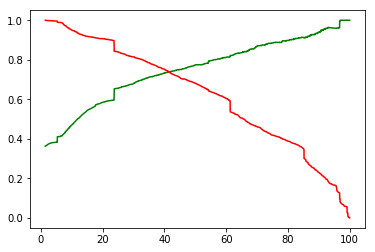

In [91]:
plt.plot(thresholds, p[:-1], "g-") # precision
plt.plot(thresholds, r[:-1], "r-") # recall
plt.show()

###  Finding Optimal Cutoff Point for Lead score

Our target lead conversion rate is around 80%. Which means Customer which are predicted as Positive, should be around 80% true positive.

So the correct measure is Precision which should be around 80%.

We will change the lead_score cutoff to increase the Presion value to 80%. If we look at the above precision recall curve, we see that at lead score between 55 to 60, the precision is around 80%. So we checked at different lead_score cutoff values between 55 to 60.

As we increase the lead_cut off score the precision increases and recall decreases. So we have selected the optimum value of lead_score cutoff (= 57) such that  Precision is near cutoff value of 80% and recall is as high as possible. 

This way we get the optimum cutoff for Lead score

In [92]:
# Updating Lead_score Cutoff value to 57. 
y_train_pred_final['predicted'] = y_train_pred_final.Lead_score.map(lambda x: 1 if x > 57 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion_Prob,Converted,CustID,Lead_score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.612646,1,2626,61.264586,1,1,1,1,1,1,1,1,0,0,0
1,0.176747,0,2973,17.674680,0,1,1,0,0,0,0,0,0,0,0
2,0.035841,0,5392,3.584126,0,1,0,0,0,0,0,0,0,0,0
3,0.052991,0,8344,5.299125,0,1,0,0,0,0,0,0,0,0,0
4,0.024545,0,1763,2.454521,0,1,0,0,0,0,0,0,0,0,0


In [93]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3275  314]
 [ 757 1272]]


In [94]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8093627625489498


In [95]:
# Calculating the Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8020176544766708

In [96]:
# Calculating Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6269098077870873

We are getting 'Precision' of 0.802. It means lead conversion rate is around 80%. Though we have to sacrifice on 'Recall' here

We will also check sensitivity and specificity with new cutoff value of 57

### Making predictions on the test set

In [97]:
# Scaling the numeric variables

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [98]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
2375,1,-0.416445,0,0,0,0,0,0,0,0
5128,0,-0.384701,0,0,0,0,0,0,1,0
2484,0,0.893505,0,0,0,0,0,0,0,0
2445,0,-0.850274,0,0,0,0,0,0,0,0
4014,0,-0.860855,0,1,0,0,0,0,0,0


In [99]:
# Adding a constant variable 
X_test_sm = sm.add_constant(X_test)

In [100]:
# Predicting on test data
y_test_pred = res.predict(X_test_sm)

In [101]:
y_test_pred[:10]

2375    0.025693
5128    0.389437
2484    0.343391
2445    0.069180
4014    0.236802
3185    0.851783
946     0.216670
1707    0.052991
4333    0.767813
89      0.489492
dtype: float64

In [102]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [103]:
# Let's see the head
y_pred_1.head()

,0
2375,0.025693
5128,0.389437
2484,0.343391
2445,0.069180
4014,0.236802


In [104]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [105]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [106]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [107]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [108]:
# Checking the dataframe head
y_pred_final.head()

,Converted,CustID,0
0,0,2375,0.025693
1,0,5128,0.389437
2,1,2484,0.343391
3,0,2445,0.069180
4,1,4014,0.236802


In [109]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [110]:
# Rearranging the columns  & Adding column for Lead_score
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Conversion_Prob'], axis=1)
y_pred_final['Lead_score']=y_pred_final['Conversion_Prob']*100 # Lead Score is calculated from Conversion Probability in 1 to 100 scale

In [111]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Conversion_Prob,Lead_score
0,2375,0,0.025693,2.569320
1,5128,0,0.389437,38.943660
2,2484,1,0.343391,34.339090
3,2445,0,0.069180,6.917963
4,4014,1,0.236802,23.680156


In [112]:
# Setting the Lead_score Cutoff value to 57 (which was considered in Train set) for predicting 'Converted'. 

y_pred_final['final_predicted'] = y_pred_final.Lead_score.map(lambda x: 1 if x > 57 else 0)

In [113]:
y_pred_final.head()

,CustID,Converted,Conversion_Prob,Lead_score,final_predicted
0,2375,0,0.025693,2.569320,0
1,5128,0,0.389437,38.943660,0
2,2484,1,0.343391,34.339090,0
3,2445,0,0.069180,6.917963,0
4,4014,1,0.236802,23.680156,0


In [114]:
# Checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8078040680780407

In [115]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1435,  120],
       [ 343,  511]], dtype=int64)

In [116]:
# Defining True & False positive & negative from confusion matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Checking sensitivity of our logistic regression model on test data
TP / float(TP+FN)

0.5983606557377049

In [118]:
# Calculating specificity  on test data
TN / float(TN+FP)

0.9228295819935691

In [119]:
# Calculating Precision of our model on test data

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8098256735340729

In [120]:
# Calculating Recall of our model on test data

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.5983606557377049

## Conclusion

In test dataset, The precision value is near target 80% and recall value is also around 59.8 %. 
The Precision value is similar to the values calculated in Train dataset. Therefore, we can say our model is stable.

The model accuracy is also similar in Test dataset as it was in Train set

#### Below are the significant features which are used in the final model.

* Lead Origin_Lead Add Form
* Last Activity_Had a Phone Conversation
* Last Notable Activity_Unreachable
* Last Activity_Olark Chat Conversation 
* Lead Source_Welingak Website
* Last Notable Activity_SMS Sent
* Do Not Email
* Lead Source_Olark Chat
* What is your current occupation_Working Professional
* Total Time Spent on Website

The above features are significant in predicting Lead score and deciding whether customer will get Converted or not.

In future scenarios, As per business requirement, the model can be used for other needs like maximum conversion of leads, etc by changing the lead score cutoff based on one of metrics i.e. Recall/ Sensitivity, Precision, Specificity etc.